파일을 찾았습니다: CSV\20230610_20250610_일봉_000660_SK하이닉스.csv

--- 불러온 데이터 ---
     종목코드     종목명         일자      시가      고가      저가     현재가      거래량  거래대금
484   660  SK하이닉스 2023-06-12  114400  115800  114000  114800  2637721   NaN
483   660  SK하이닉스 2023-06-13  117000  120100  117000  119500  6232477   NaN
482   660  SK하이닉스 2023-06-14  118800  119700  118100  118800  3240260   NaN
481   660  SK하이닉스 2023-06-15  120200  121100  118000  119000  3778592   NaN
480   660  SK하이닉스 2023-06-16  117300  119800  116300  118900  4303391   NaN


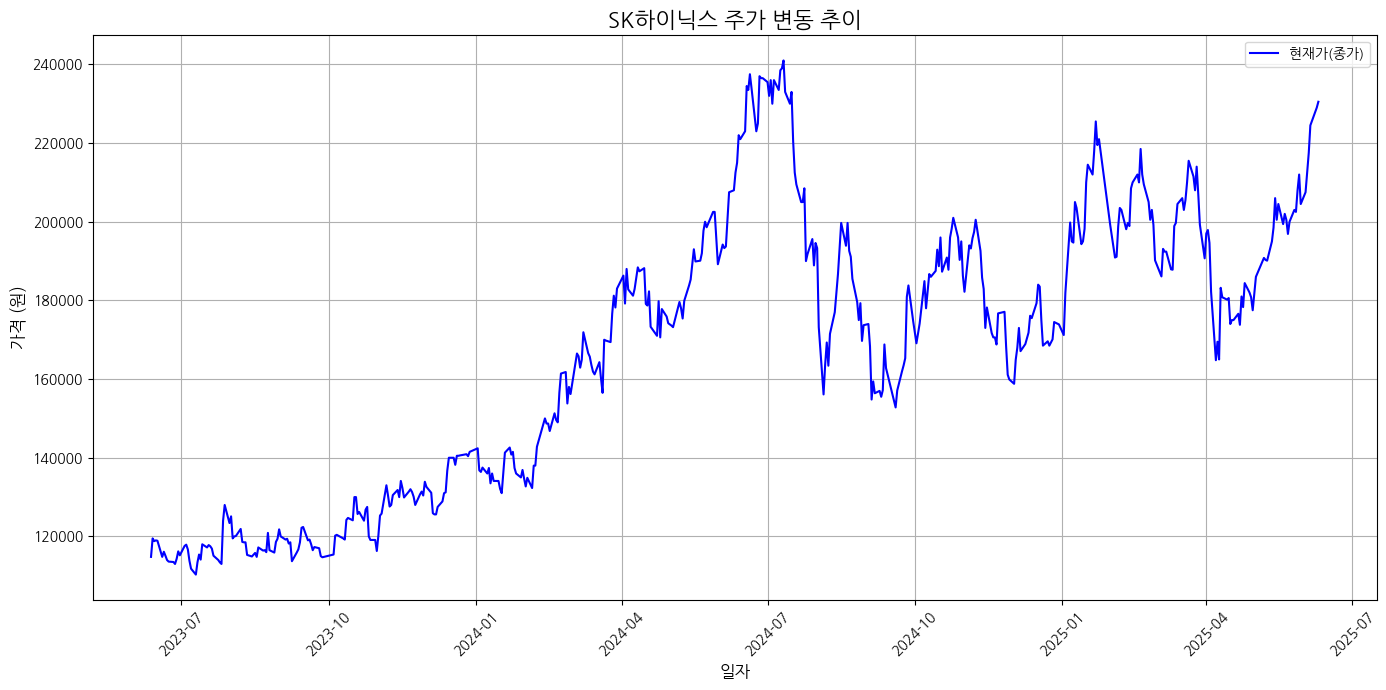

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from datetime import datetime

# 한글 폰트 설정 (이 부분은 환경에 맞게 조정될 수 있습니다)
# Colab, Kaggle 등 웹 기반 환경에서는 보통 아래 코드로 한글 설정이 가능합니다.
# 로컬 환경에서는 설치된 폰트 경로를 지정해야 할 수 있습니다.
try:
    plt.rc('font', family='NanumGothic') 
except:
    print('나눔고딕 폰트를 찾을 수 없어 기본 폰트로 표시됩니다. 한글이 깨질 수 있습니다.')
    pass

# 사용할 변수들
# CSV 파일이 있는 폴더 경로
folder_path = 'CSV' 

# TODO : 회사이름을 다른 파이썬 파일로 부터 받는것을 개발해야함
# 회사 이름
# _TEST : 회사 이름
company_name = 'SK하이닉스' 

# 오늘 날짜
# ex) 2025년 6월 10일 -> '20250610'
# today_str = datetime.now().strftime('%Y%m%d')

# _TEST : 오늘 날짜
today_str = '20250610'

# 찾은 파일 경로를 저장하기 위한 변수
found_file = None

# 파일 검색
# 지정된 폴더 내의 모든 파일 목록을 가져옴
try:
    for filename in os.listdir(folder_path):
        # 파일명에 오늘 날짜가 포함되고, 지정된 회사 이름으로 끝나는지 확인
        if today_str in filename and filename.endswith(f'{company_name}.csv'):
            # 전체 파일 경로를 생성
            found_file = os.path.join(folder_path, filename)
            print(f"파일을 찾았습니다: {found_file}")
            break # 파일을 찾으면 반복 중단
except FileNotFoundError:
    print(f"오류: '{folder_path}' 폴더를 찾을 수 없습니다. 폴더가 정확한 위치에 있는지 확인해주세요.")
    found_file = None

# --- 파일 불러오기 ---
if found_file:
    try:

        # 1. CSV 파일 읽기 (필요한 앞 9개 컬럼만 선택)
        df = pd.read_csv(found_file, encoding='utf-8', usecols=range(9))

        # 2. 데이터 준비
        # '일자' 컬럼을 날짜 형식으로 변환
        df['일자'] = pd.to_datetime(df['일자'], format='%Y%m%d')
        # 날짜순으로 정렬 (그래프를 시간 순서대로 그리기 위함)
        df = df.sort_values(by='일자')

        # _TEST
        # 불러온 데이터의 첫 5행을 출력하여 확인
        # print("\n--- 불러온 데이터 ---")
        # print(df.head())

        # 3. 그래프 그리기
        # 그래프 크기 설정
        plt.figure(figsize=(14, 7))

        # 꺾은선 그래프 그리기 (x축: 일자, y축: 현재가)
        plt.plot(df['일자'], df['현재가'], label='현재가(종가)', color='blue')

        # 그래프 제목 및 라벨 설정
        plt.title('SK하이닉스 주가 변동 추이', fontsize=16)
        plt.xlabel('일자', fontsize=12)
        plt.ylabel('가격 (원)', fontsize=12)
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45) # x축 날짜 라벨이 겹치지 않게 45도 회전
        plt.tight_layout() # 여백 최적화


        # 4. 그래프를 화면에 출력
        plt.show()

    except Exception as e:
        print(f"파일을 불러오는 중 오류가 발생했습니다: {e}")
else:
    print(f"\n오늘 날짜({today_str})와 '{company_name}' 회사명을 포함하는 CSV 파일을 찾지 못했습니다.")
